In [8]:
import pandas as pd
import numpy as np
import pickle
import json

In [40]:
# 3d plot the midpoints
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [9]:
sims_file = 'GenTestSpecs/sims_01.csv'
res_info_folder = '../01_GeneratePureSpectrums/ResInfo/res_info_'
sims_df = pd.read_csv(sims_file)
print(sims_df)
pickle_files = 'GenTestSpecs/specs/'+sims_df['filename']+'.pkl'

  soil_resolution function    id                 filename
0           1x1x1  Coconut  1022     1x1x1_Coconut_001022
1           2x2x2  Coconut  1045     2x2x2_Coconut_001045
2        10x10x10  Coconut  1068  10x10x10_Coconut_001068


In [10]:

i = 2

pickle_file = pickle_files[i]
soil_resolution = sims_df['soil_resolution'][i]
res_info_file = res_info_folder + str(soil_resolution) + '.json'
res_info = json.load(open(res_info_file, 'r'))
midpoints = np.array(res_info['midpoints'])
detector_tally_ids = [int(r) for r in res_info['detector_tally_ids']]
cell_ids = [int(r) for r in res_info['cell_ids']]

In [11]:
i_bins, i_spectrums= pickle.load(open(pickle_file, 'rb'))
energy_bins = i_bins[-1][-2]

In [12]:
deposition_bins = [int(bin) for bin in i_bins[-1][0]]
deposition_spec = i_spectrums[-1]

new_shape = np.array(deposition_spec.shape)
new_shape[0] = len(cell_ids)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in deposition_bins:
        new_array[j] = deposition_spec[deposition_bins.index(cell_ids[j])]

full_deposition_spec = new_array

In [13]:
deposition_intensity = new_array.sum(axis=-2).flatten()
deposition_activity = deposition_intensity
# put intensity in 0-1 range
deposition_intensity = deposition_intensity / deposition_intensity.max()

In [35]:
flux_bins = [int(bin) for bin in i_bins[-2][0]]
flux_spec = i_spectrums[-2]

new_shape = np.array(flux_spec.shape)
new_shape[0] = len(cell_ids)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in flux_bins:
        new_array[j] = flux_spec[flux_bins.index(cell_ids[j])]
full_flux_spec = new_array

In [38]:
flux_intensity = new_array.sum(axis=-2).flatten()
flux_activity = flux_intensity
# put intensity in 0-1 range    
flux_intensity = flux_intensity / flux_intensity.max()

In [64]:
i_bins[4]

[(101.0,),
 (1.0, 2.0),
 (1.0,),
 (1.0,),
 (1.0,),
 (1.0,),
 (0.0,
  1e-05,
  0.00904482,
  0.0180796,
  0.0271145,
  0.0361493,
  0.0451841,
  0.0542189,
  0.0632538,
  0.0722886,
  0.0813234,
  0.0903582,
  0.0993931,
  0.108428,
  0.117463,
  0.126498,
  0.135532,
  0.144567,
  0.153602,
  0.162637,
  0.171672,
  0.180706,
  0.189741,
  0.198776,
  0.207811,
  0.216846,
  0.225881,
  0.234915,
  0.24395,
  0.252985,
  0.26202,
  0.271055,
  0.28009,
  0.289124,
  0.298159,
  0.307194,
  0.316229,
  0.325264,
  0.334298,
  0.343333,
  0.352368,
  0.361403,
  0.370438,
  0.379473,
  0.388507,
  0.397542,
  0.406577,
  0.415612,
  0.424647,
  0.433682,
  0.442716,
  0.451751,
  0.460786,
  0.469821,
  0.478856,
  0.48789,
  0.496925,
  0.50596,
  0.514995,
  0.52403,
  0.533065,
  0.542099,
  0.551134,
  0.560169,
  0.569204,
  0.578239,
  0.587274,
  0.596308,
  0.605343,
  0.614378,
  0.623413,
  0.632448,
  0.641482,
  0.650517,
  0.659552,
  0.668587,
  0.677622,
  0.686657,
  0.69

In [41]:
def onespec(specs, n=0):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.plot(energy_bins, specs[n].flatten(), label='Cell ID: {}'.format(cell_ids[n]))
    ax.set_yscale('log')
    plt.title('Cell ID: {}'.format(cell_ids[n]))
    fig.show()

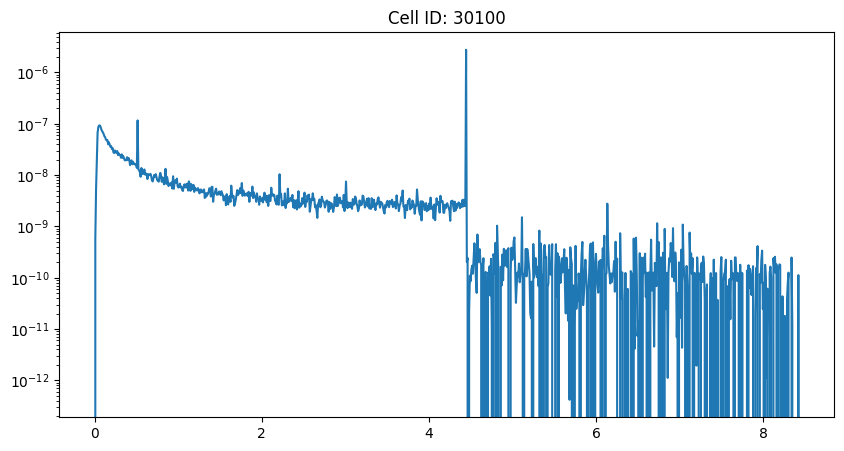

In [52]:
onespec(full_flux_spec, n=100)

In [54]:
def intensitymap(intensity, elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2], c=1-intensity, marker='o', s=intensity*40, alpha=intensity)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()


    # xx, yy = np.meshgrid(np.linspace(*xlim, 10), np.linspace(*ylim, 10))
    # zz = np.zeros_like(xx)
    # ax.plot_surface(xx, yy, zz-20, alpha=1, color='black')

    # xx, zz = np.meshgrid(np.linspace(*xlim, 10), np.linspace(*zlim, 10))
    # yy = np.zeros_like(xx)
    # ax.plot_surface(xx, yy, zz, alpha=1, color='black')

    # yy, zz = np.meshgrid(np.linspace(*ylim, 10), np.linspace(*zlim, 10))
    # xx = np.zeros_like(yy)
    # ax.plot_surface(xx, yy, zz, alpha=1, color='black')

    # change the view angle
    ax.view_init(elev=elev, azim=azim)
    # ax.view_init(elev=0, azim=0)

    # add a color bar
    sc = ax.scatter(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2], c=intensity, marker='o', s=intensity*200, alpha=intensity)
    fig.colorbar(sc, ax=ax, label='Relative Intensity', shrink=0.5, aspect=10)

    # make voxel style
    ax.set_box_aspect([1, 1, 1])  # aspect ratio is 1:1:1

    plt.title('3D Scatter Plot of Midpoints with Relative Intensity')
    plt.tight_layout()
    plt.show()

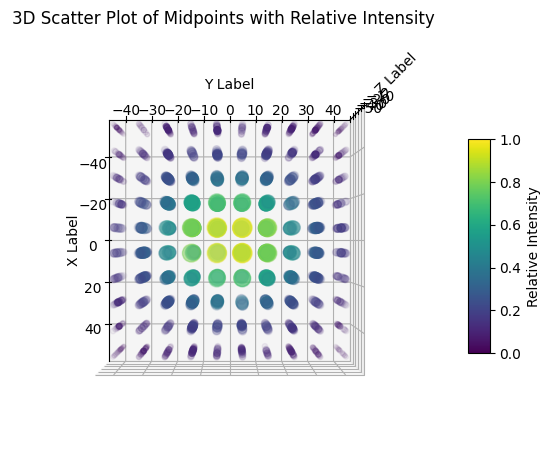

In [53]:
intensitymap(intensity=flux_intensity, elev=90, azim=0)

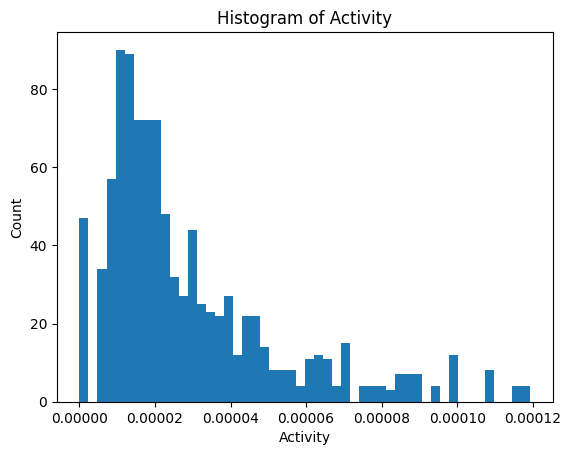

In [56]:
# histogram of intensity
plt.figure()
plt.hist(flux_activity, bins=50)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Histogram of Activity')
# the histogram log scale
# plt.yscale('log')
plt.show()